# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


##1) Importe las librerias

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como:

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
xy-\beta z\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parámetros y  realice un gráfico en 3D de la solución, empleando el código de más abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Cómo puede estar seguro de que la solución es la esperada?


##2) defina la función

In [ ]:
def Atractor(Cin, t, sigma, beta,rho):
    x,y,z = Cin
    dydt = [sigma*(y-x), x*(rho - z)-y,x*y-beta*z]
    return dydt

##3) Pruebe con distintas condiciones iniciales

$\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

In [ ]:
t = np.linspace(0,30, 10000)
y01 = [1.5, 1.5,1.5]
sigma=10
beta=8/3
rho=25
sol1 = odeint(Atractor, y01, t, args=(sigma,beta,rho))
x1=sol1[:, 0]
y1=sol1[:, 1]
z1=sol1[:, 2]

$\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

In [ ]:
y02 = [1,1,1]
sol2 = odeint(Atractor, y02, t, args=(sigma,beta,rho))
x2=sol2[:, 0]
y2=sol2[:, 1]
z2=sol2[:, 2]

$\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

In [ ]:
y03 = [1.001,1.001,1.001]
sol3 = odeint(Atractor, y03, t, args=(sigma,beta,rho))
x3=sol3[:, 0]
y3=sol3[:, 1]
z3=sol3[:, 2]

$\sigma = 15.0$, $\beta = 16./3$ ,$\rho = 20$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

In [ ]:
y04 = [1.5, 1.5,1.5]
sigma4=15
beta4=16/3
rho4=20
sol4 = odeint(Atractor, y04, t, args=(sigma4,beta4,rho4))
x4=sol4[:, 0]
y4=sol4[:, 1]
z4=sol4[:, 2]

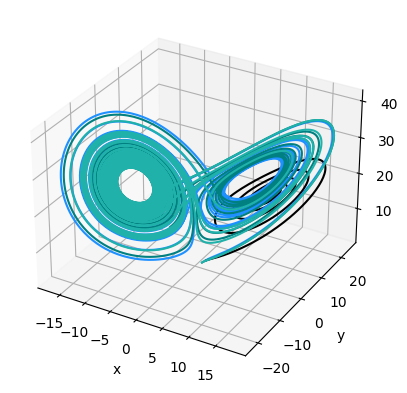

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot(x4,y4,z4,color="black")
ax.plot(x1,y1,z1,color="dodgerblue")
ax.plot(x2,y2,z2,color="teal")
ax.plot(x3,y3,z3,color="lightseagreen")
plt.draw()
plt.show()

4) Cómo se sabe que es la soluciòn correcta?

Comparandolo con las soluciones vistas en la pagina, podemos darnos cuenta que las soluciones coinciden